In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import tensorflow.keras
import matplotlib.pyplot as plt

In [4]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Activation
from keras.utils import to_categorical

In [5]:
data = tf.keras.datasets
data

<module 'keras.api._v2.keras.datasets' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/__init__.py'>

In [6]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
print("X_train shape :",X_train.shape)
print("X_test shape :",X_test.shape)
print("y_train shape :",y_train.shape)
print("y_test shape :",y_test.shape)

X_train shape : (60000, 28, 28)
X_test shape : (10000, 28, 28)
y_train shape : (60000,)
y_test shape : (10000,)


In [8]:
 X_train[0].shape

(28, 28)

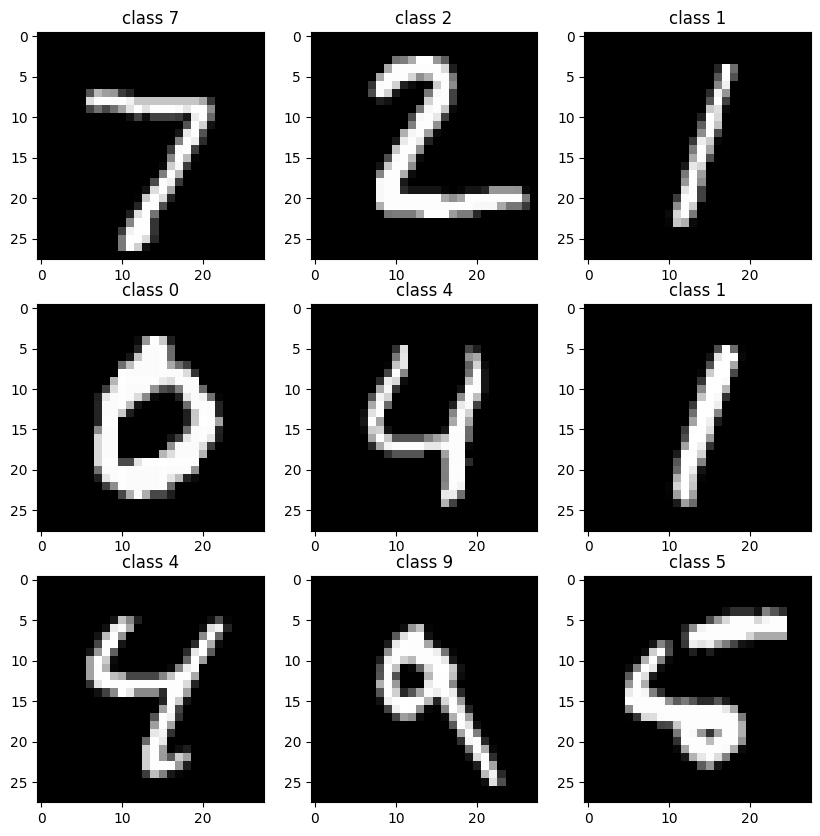

In [9]:
plt.rcParams["figure.figsize"]=(10,10)
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[i],cmap="gray")
  plt.title(f'class {y_test[i]}')


In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train[0].shape

(28, 28)

In [12]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
type(y_test[0])

numpy.uint8

In [14]:
y_test[0]

7

In [15]:
y_test = to_categorical(y_test)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [16]:
y_test.shape

(10000, 10)

In [17]:
y_train = to_categorical(y_train)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [19]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
X_test = X_test/255
X_train = X_train/255

In [21]:
model = Sequential([
    Dense(512,activation='relu',),
    Dense(256,activation='relu',),
    Dense(128,activation='relu',),
    Dense(64,activation='relu',),
    Dense(10,activation='softmax',)
])

In [22]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [23]:
history = model.fit(X_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
469/469 [==============================] - 9s 6ms/step - loss: 0.2464 - accuracy: 0.9275 - val_loss: 0.1116 - val_accuracy: 0.9647
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0897 - accuracy: 0.9726 - val_loss: 0.0975 - val_accuracy: 0.9695
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0588 - accuracy: 0.9818 - val_loss: 0.0700 - val_accuracy: 0.9791
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0428 - accuracy: 0.9863 - val_loss: 0.0684 - val_accuracy: 0.9795
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0354 - accuracy: 0.9885 - val_loss: 0.0690 - val_accuracy: 0.9796
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0258 - accuracy: 0.9915 - val_loss: 0.0883 - val_accuracy: 0.9755
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.0743 - val_accuracy: 0.9795
Epoch 

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575050 (2.19 MB)
Trainable params: 575050 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
history.history["accuracy"]

[0.9275166392326355,
 0.9726333618164062,
 0.9817833304405212,
 0.9863499999046326,
 0.9884666800498962,
 0.9915000200271606,
 0.9918666481971741,
 0.9929500222206116,
 0.9929999709129333,
 0.9949166774749756]

In [27]:
pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [29]:
pred[0]

array([1.3111712e-06, 1.7018128e-05, 5.4655254e-07, 2.8544147e-05,
       1.0581808e-04, 8.5574192e-07, 1.3417943e-09, 9.9966085e-01,
       5.8724640e-06, 1.7924512e-04], dtype=float32)

In [30]:
np.argmax(pred[0])

7

In [32]:
np.argmax(pred[1])

2

In [33]:
np.argmax(pred[2])

1